### 농어(perch)의 길이 데이터를 통해 농어 무게 예측하는 모델 만들기

# 1. 데이터 준비

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     ) # 농어 길이에 해당하는 값의 리스트 - np.array에 전달

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ) # 농어 무게에 해당하는 값의 리스트 - np.array에 전달


In [2]:
from sklearn.model_selection import train_test_split
    # 훈련 데이터와 테스트 데이터 분리하기
    
train_data, test_data, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

train_data = train_data.reshape(-1,1) # 2차원 배열로 변경하기
test_data = test_data.reshape(-1,1) # 2차원 배열로 변경하기

# 2. 모델 학습 (K-NN Regression)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
   
knr = KNeighborsRegressor(n_neighbors = 3) # 객체 지정, 이웃의 수 설정
knr.fit(train_data, train_target) # 훈련 세트를 모델 객체에 전달해 모델 학습시키기

KNeighborsRegressor(n_neighbors=3)

# 3. 예측 및 이웃 샘플 구하기

In [4]:
knr.predict([[50]]) # 길이가 50인 농어의 몸무게를 예측하기 output = 1033

array([1033.33333333])

In [5]:
distances, indexes = knr.kneighbors([[50]])
print('distances: ', distances)
print('indexes: ', indexes)

distances:  [[6. 7. 7.]]
indexes:  [[34  8 14]]


## 3-1. 데이터 시각화 (이웃 샘플 포함)

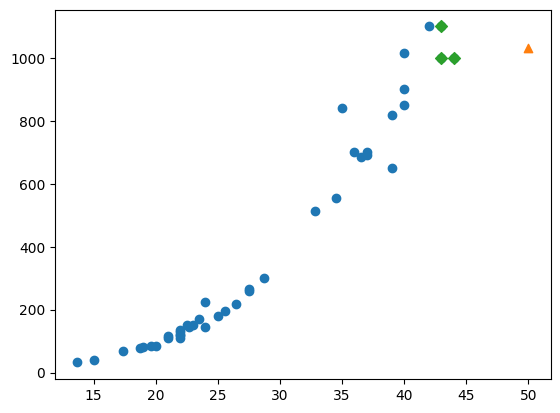

In [6]:
import matplotlib.pyplot as plt

plt.scatter(train_data, train_target)
plt.scatter(50, 1033, marker = '^')
plt.scatter(train_data[indexes], train_target[indexes], marker = 'D')
plt.show()

In [7]:
np.mean(train_target[indexes]) # 가까운 이웃에 해당하는 물고기들의 평균 몸무게(target)

1033.3333333333333

# 4. K-NN 알고리즘의 한계

In [8]:
# knr.predict([[50]]) = 1033
knr.predict([[100]])

array([1033.33333333])

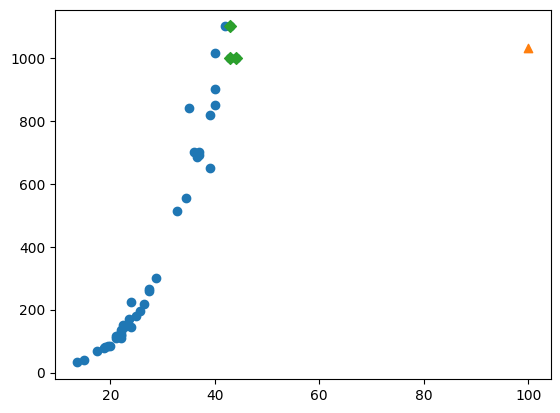

In [9]:
distances, indexes = knr.kneighbors([[100]])
    # 100 cm 농어의 이웃을 구한다.

plt.scatter(train_data, train_target)
plt.scatter(100, 1033, marker = '^')
plt.scatter(train_data[indexes], train_target[indexes], marker = 'D')
plt.show()

- **K-NN 알고리즘은 가장 가까운 거리에 있는 데이터와 같은 범주에 있다는 가정 하에 예측을 하기 때문에 길이가 길어질수록 무게가 증가함에도 불구하고 데이터 상에서는 일정 길이 이상부터는 무게가 증가하지 않는 예측을 할 것이다. 이런 오류를 피하기 위해서 독립 변수가 1개일 때는 단순선형회귀를, 1개의 독립 변수의 차수를 증가 시키는 다항선형회귀를, 2개 이상의 독립변수를 가질 때에는 다중선형회귀를 사용할 수 있다.**